# Semana 4 - Estruturas não-lineares - AVP

## AVP - Arvore vermelho e preto

In [1]:
# Instala graphviz. Só precisa fazer uma vez
!pip install graphviz

You should consider upgrading via the '/home/jairo/opencv-course/bin/python3 -m pip install --upgrade pip' command.


In [63]:
# Codigo original retirado de: https://www.programiz.com/dsa/red-black-tree
# Codigo alterado consideravelmente para bater com apresentação e corrigir erros
# Adicionado visualização com graphviz

# Implementing Red-Black Tree in Python

import sys
import graphviz


# Node creation
class Node():
    def __init__(self, key):
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.color = 0


class RedBlackTree():
    def __init__(self):
        self.root = Node(None)
        

    # Preorder
    def pre_order_helper(self, node):
        if node.key != None:
            sys.stdout.write(node.key + " ")
            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    # Inorder
    def in_order_helper(self, node):
        if node.key != None:
            self.in_order_helper(node.left)
            sys.stdout.write(node.key + " ")
            self.in_order_helper(node.right)

    # Postorder
    def post_order_helper(self, node):
        if node.key != None:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)
            sys.stdout.write(node.key + " ")

    # Search the tree
    def search_tree_helper(self, node, key):
        if node.key == None or key == node.key:
            return node

        if key < node.key:
            return self.search_tree_helper(node.left, key)
        return self.search_tree_helper(node.right, key)

    # Balancing the tree after deletion
    # Esta identico da apresentacao
    def delete_fix(self, x):
        # Enquanto raiz ou preto
        while x != self.root and x.color == 0:
            print("z = {} é preto".format(x.key))
            if x == x.parent.left:
                # Filho de esquerda
                s = x.parent.right
                # Irmao vermelho?
                if s.color == 1:
                    print("Caso 1: irmao de z é vermelho ")
                    print("Irmao fica preto, pai vermelho. Rotacao a esquerda do pai")
                    s.color = 0
                    x.parent.color = 1
                    self.left_rotate(x.parent)
                    s = x.parent.right
                    self.print_pretty_tree()
                # Filhos do pai são pretos?
                if s.left.color == 0 and s.right.color == 0:
                    print("Caso 2: - irmao é preto e tem dois filhos pretos")
                    print("Irmao fica vermelho,  pai vira novo z = {}".format(x.parent.key))
                    s.color = 1
                    x = x.parent
                    self.print_pretty_tree()
                else:
                    # irmao direito preto?
                    if s.right.color == 0:
                        print("Caso 3: irmao é preto com filho direito preto e esquerdo vermelho")
                        print("Filho esquerdo do irmao fica preto, e irmao ficao vermelho. Rotacao a direita no irmao")
                        s.left.color = 0
                        s.color = 1
                        self.right_rotate(s)
                        s = x.parent.right
                        self.print_pretty_tree()
                    print("Caso 4: irmao é preto com filho direito vermelho")
                    print("Irmao fica com cor do pai, pai e filho direito do irmao fica preto. Rotacao a esquerda do pai")
                    s.color = x.parent.color
                    x.parent.color = 0
                    s.right.color = 0
                    self.left_rotate(x.parent)
                    x = self.root
                    self.print_pretty_tree()
            else:
                # Filho da direita
                s = x.parent.left
                if s.color == 1:
                    print("Caso 1: irmao de z é vermelho ")
                    print("Irmao fica preto, pai vermelho. Rotacao a direita do pai")
                    s.color = 0
                    x.parent.color = 1
                    self.right_rotate(x.parent)
                    s = x.parent.left
                    self.print_pretty_tree()

                if s.left.color == 0 and s.right.color == 0:
                    print("Caso 2: - irmao é preto e tem dois filhos pretos")
                    print("Irmao fica vermelho,  pai vira novo z = {}".format(x.parent.key))
                    s.color = 1
                    x = x.parent
                    self.print_pretty_tree()
                else:
                    # Irmao esquerdo preto?
                    if s.left.color == 0:
                        print("Caso 3: irmao é preto com filho esquerdo preto e direito vermelho")
                        print("Filho direito do irmao fica preto, e irmao fica vermelho. Rotacao a esquerda no irmao")
                        s.right.color = 0
                        s.color = 1
                        self.left_rotate(s)
                        s = x.parent.left
                        self.print_pretty_tree()

                    print("Caso 4: irmao é preto com filho esquerdo vermelho")
                    print("Irmao fica com cor do pai, pai e filho esquerdo do irmao fica preto. Rotacao a direita do pai")
                    s.color = x.parent.color
                    x.parent.color = 0
                    s.left.color = 0
                    self.right_rotate(x.parent)
                    x = self.root
                    self.print_pretty_tree()
                    
        if x.color == 1:
            print("z fica preto")
            x.color = 0
            self.print_pretty_tree()


    def __rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def delete_node_helper(self, node, key):
        z = None
        while node.key != None:
            if node.key == key:
                z = node

            if node.key <= key:
                node = node.right
            else:
                node = node.left
                
        if z == None:
            print("Cannot find key in the tree")
            return
        
        if (z.left.key is None) or (z.right.key is None):
            y = z
        else:
            y = self.successor(z)
            print("z = {} com dois filhos, pega sucessor {}".format(z.key,y.key))
            
        if y.left.key:
            x = y.left
        else:
            x = y.right
        
        
        x.parent = y.parent
            
        
        if y.parent.key is None:
            self.root = x
        else:
            if y == y.parent.left:
                y.parent.left = x
            else:
                y.parent.right = x
        
        if y.key != z.key:
            z.key = y.key
            
        self.print_pretty_tree()
        if y.color == 0:
            print("Mexeu em nó preto. Recolore em z = {}".format(x.key))
            self.delete_fix(x)
        return y        
        
    # Node deletion
    def delete_node_helper_old(self, node, key):
        z = None
        while node.key != None:
            if node.key == key:
                z = node

            if node.key <= key:
                node = node.right
            else:
                node = node.left
                
        if z.key == None:
            print("Cannot find key in the tree")
            return

        y = z
        y_original_color = y.color
        if z.left.key == None:
            print("z={} sem filho na esquerda".format(z.key))
            x = z.right
            self.__rb_transplant(z, z.right)
        elif (z.right.key == None):
            print("z={} sem filho na direita".format(z.key))
            x = z.left
            self.__rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            print("z={} com dois filhos. Sucessor = {}".format(z.key, y.key))
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.__rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant(z, y)
            y.left = z.left
            # Equivalente a 
            # Se y !=z
            # ENTAO chave(z) <- chave(y)
            # No slide troca a chave, mas aqui atualiza o nó. Por isso que altera a cor
            y.left.parent = y
            y.color = z.color
        self.print_pretty_tree()

        if y_original_color == 0:
            print("y = {} cor original preto recolore".format(y.key))
            self.delete_fix(x)
        


    # Balance the tree after insertion
    def fix_insert(self, k):
        while k.parent.color == 1:
            print("Pai de z {} é vermelho".format(k.key))
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 1:
                    print("Caso 1: tio de z é vermelho")
                    print("Pai e tio ficam preto, avo vermelho, avo é novo z = {}".format(k.parent.parent.key))
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                    self.print_pretty_tree()
                else:
                    if k == k.parent.left:
                        print("Caso 2: tio y de z é preto e z é filho esquerdo")
                        print("Pai é novo z = {}. Rotacao a direita em z".format(k.parent.key))
                        k = k.parent
                        self.right_rotate(k)
                        self.print_pretty_tree()
                    
                    print("Caso 3: tio y de z é preto e z é filho direito")
                    print("Pai fica preto, avo vermelho e rotacao a esquerda no avo")
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.left_rotate(k.parent.parent)
                    self.print_pretty_tree()
            else:
                u = k.parent.parent.right
                if u.color == 1:
                    print("Caso 1: tio de z é vermelho")
                    print("Pai e tio ficam preto, avo vermelho, avo é novo z = {}".format(k.parent.parent.key))
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                    self.print_pretty_tree()
                else:
                    if k == k.parent.right:
                        print("Caso 2: tio y de z é preto e z é filho direito")
                        print("Pai é novo z = {}. Rotacao a esquerda em z".format(k.parent.key))
                        k = k.parent
                        self.left_rotate(k)
                        self.print_pretty_tree()
                    
                    print("Caso 3: tio y de z é preto e z é filho esquerdo ")
                    print("Pai fica preto, avo vermelho e rotacao a direita no avo")
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.right_rotate(k.parent.parent)
                    self.print_pretty_tree()


            if k == self.root:
                break
        if self.root.color == 1:
            print("Raiz fica preto")
            self.root.color = 0
            self.print_pretty_tree()

    # Printing the tree
    def __print_helper(self, node, indent, last):
        if node.key != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "

            s_color = "RED" if node.color == 1 else "BLACK"
            print(str(node.key) + "(" + s_color + ")")
            self.__print_helper(node.left, indent, False)
            self.__print_helper(node.right, indent, True)
            
    # Print a pretty  tree
    def print_pretty_helper(self, currPtr):
        def add_nodes_edges(tree, dot=None):
            # Create Digraph object
            if dot is None:
                dot = graphviz.Digraph()
                #dot.node(name=str(tree), label=str(tree.val))
                if tree.color == 1:
                    dot.node(name=str(tree), label=str(tree.key), color='red')
                else:
                    dot.node(name=str(tree), label=str(tree.key), color='black')

            # Add nodes
            if tree.left:
                if tree.left.color == 1:
                    dot.node(name=str(tree.left), label=str(tree.left.key), color='red')
                else:
                    dot.node(name=str(tree.left), label=str(tree.left.key), color='black')

                dot.edge(str(tree), str(tree.left))
                dot = add_nodes_edges(tree.left, dot=dot)


            if tree.right:
                if tree.right.color == 1:
                    dot.node(name=str(tree.right), label=str(tree.right.key), color='red')
                else:
                    dot.node(name=str(tree.right), label=str(tree.right.key), color='black')
                
                dot.edge(str(tree), str(tree.right))
                dot = add_nodes_edges(tree.right, dot=dot)

            return dot

        if currPtr != None:
            dot = add_nodes_edges(currPtr)

        # Visualize the graph
        display(dot)

        return dot


    def preorder(self):
        self.pre_order_helper(self.root)

    def inorder(self):
        self.in_order_helper(self.root)

    def postorder(self):
        self.post_order_helper(self.root)

    def searchTree(self, k):
        return self.search_tree_helper(self.root, k)

    def minimum(self, node):
        while node.left.key != None:
            node = node.left
        return node

    def maximum(self, node):
        while node.right.key != None:
            node = node.right
        return node

    def successor(self, x):
        if x.right.key != None:
            return self.minimum(x.right)

        y = x.parent
        while y.key != None and x == y.right:
            x = y
            y = y.parent
        return y

    def predecessor(self,  x):
        if (x.left.key != None):
            return self.maximum(x.left)

        y = x.parent
        while y.key != None and x == y.left:
            x = y
            y = y.parent

        return y

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left.key != None:
            y.left.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right.key != None:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y
    
    def insert_list(self, keys):
        for key in keys:
            self.insert(key)

    def insert(self, key):
        print("Insere {}".format(key))
        node = Node(key)
        node.parent = None
        node.key = key
        node.left = Node(None)
        node.right = Node(None)
        node.color = 1

        y = None
        x = self.root

        #while x != self.nil:
        while x.key != None:
            y = x
            if node.key < x.key:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = 0
            self.print_pretty_tree()
            return

        if node.parent.parent == None:
            self.print_pretty_tree()
            return
        
        self.print_pretty_tree()
        self.fix_insert(node)

    def get_root(self):
        return self.root

    def delete_node(self, key):
        print("Remove {}".format(key))
        self.delete_node_helper(self.root, key)

    def print_tree(self):
        self.__print_helper(self.root, "", True)
        
    def print_tree(self):
        self.__print_helper(self.root, "", True)

    def print_pretty_tree(self):
        self.print_pretty_helper(self.root)


Insere 11


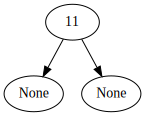

Insere 2


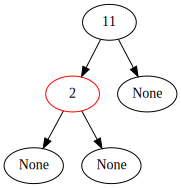

Insere 14


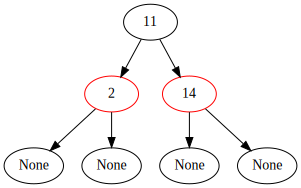

Insere 15


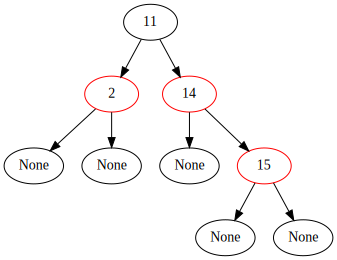

Pai de z 15 é vermelho
Caso 1: tio de z é vermelho
Pai e tio ficam preto, avo vermelho, avo é novo z = 11


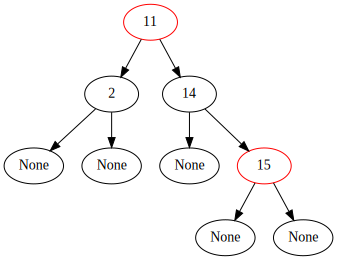

Raiz fica preto


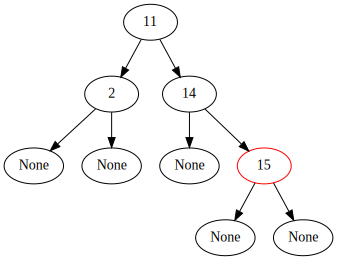

Insere 1


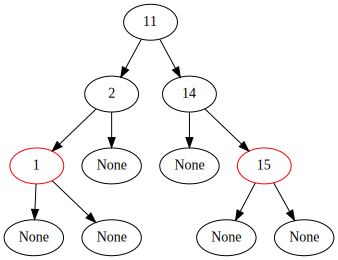

Insere 7


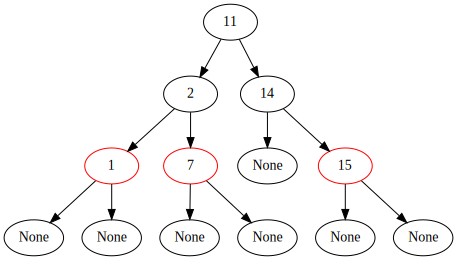

Insere 5


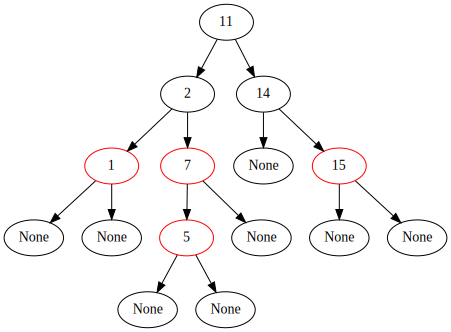

Pai de z 5 é vermelho
Caso 1: tio de z é vermelho
Pai e tio ficam preto, avo vermelho, avo é novo z = 2


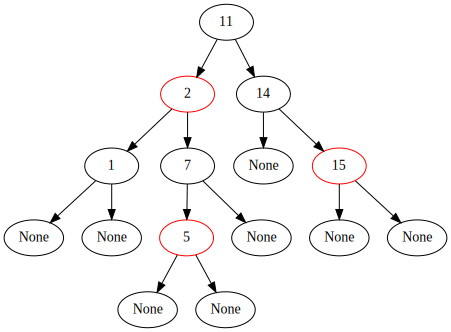

Insere 8


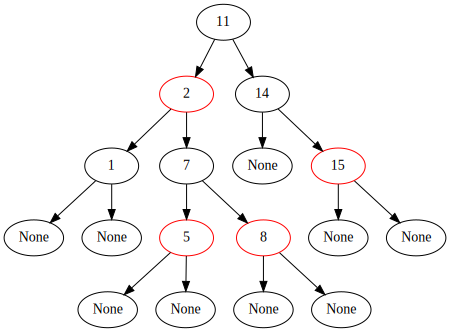

In [64]:
bst = RedBlackTree()
bst.insert_list([11,2,14,15,1,7,5,8])

## S140E1: Utilizando o applet de árvores, reproduza o exemplo de inserção do nó 4 na árvore do slide 127.

Insere 4


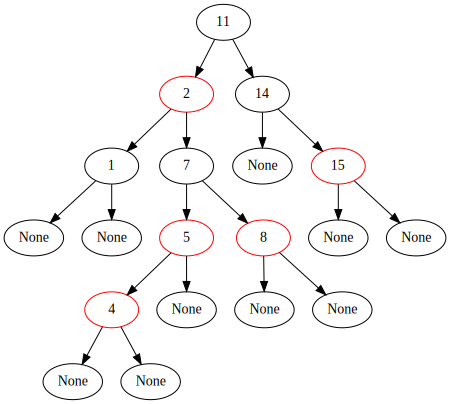

Pai de z 4 é vermelho
Caso 1: tio de z é vermelho
Pai e tio ficam preto, avo vermelho, avo é novo z = 7


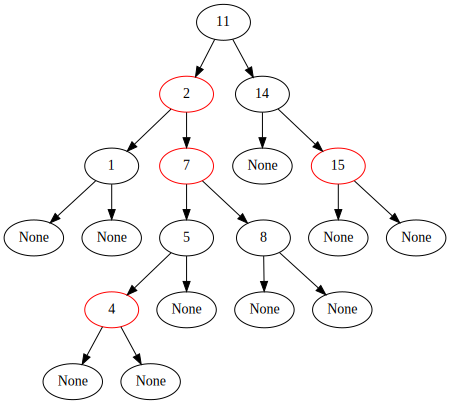

Pai de z 7 é vermelho
Caso 2: tio y de z é preto e z é filho direito
Pai é novo z = 2. Rotacao a esquerda em z


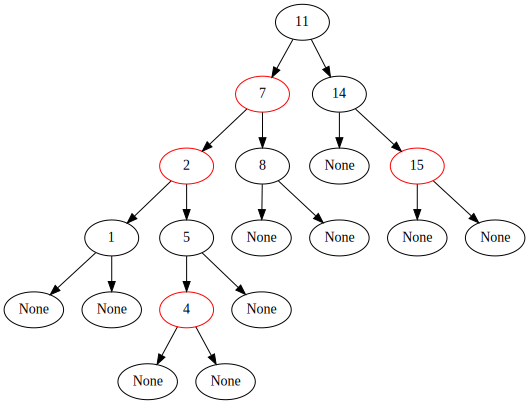

Caso 3: tio y de z é preto e z é filho esquerdo 
Pai fica preto, avo vermelho e rotacao a direita no avo


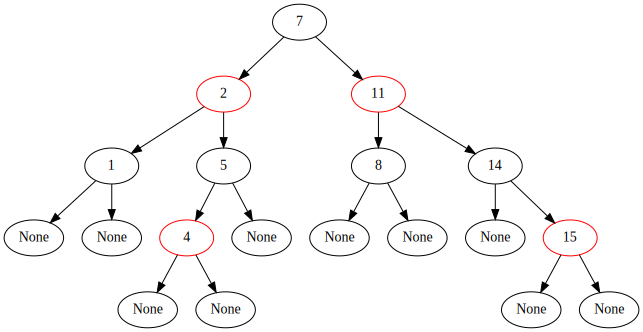

In [56]:
bst.insert(4)

## S140E2: Apresente as árvores de remoção do nó 11 da árvore do slide 137.

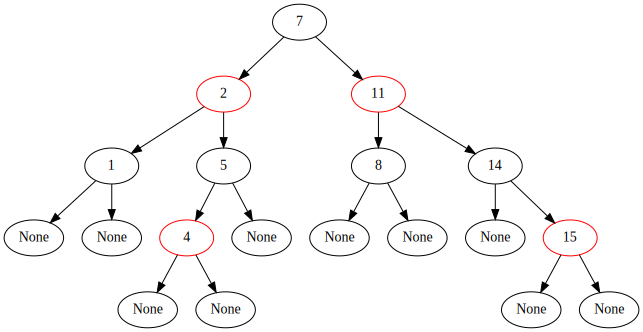

Remove 11
z = 11 com dois filhos, pega sucessor 14


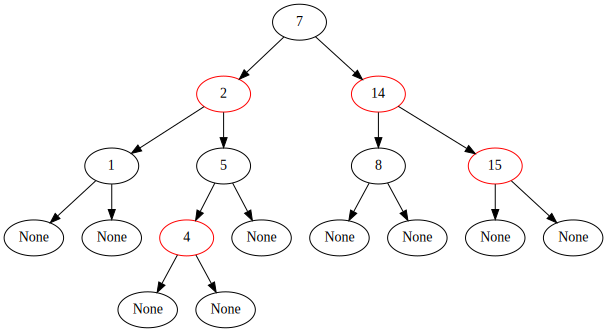

Mexeu em nó preto. Recolore em z = 15
z fica preto


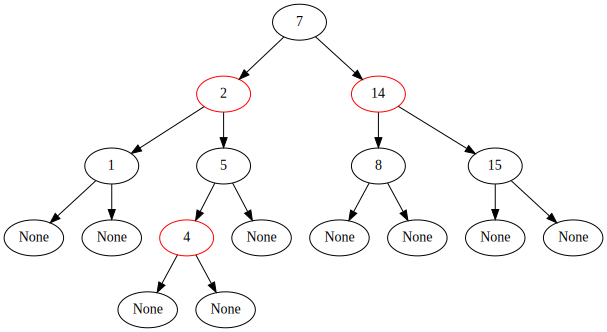

In [57]:
bst.print_pretty_tree()
bst.delete_node(11)

## S140E3: Apresente as árvores de remoção do nó 8 da árvore do exercício anterior.

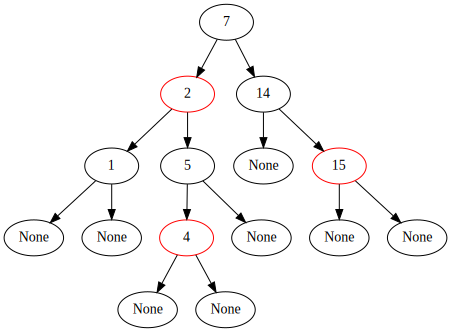

Remove 8
Cannot find key in the tree


In [59]:
bst.print_pretty_tree()
bst.delete_node(8)

## S140E4: Apresente as árvores de remoção do nó 1 da árvore do exercício anterior.

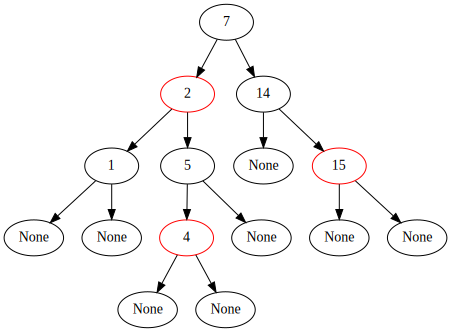

Remove 1


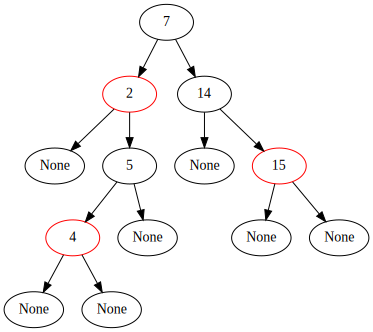

Mexeu em nó preto. Recolore em z = None
z = None é preto
Caso 3: irmao é preto com filho direito preto e esquerdo vermelho
Filho esquerdo do irmao fica preto, e irmao ficao vermelho. Rotacao a direita no irmao


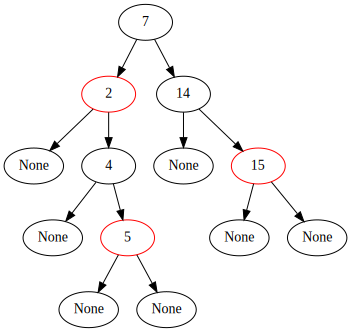

Caso 4: irmao é preto com filho direito vermelho
Irmao fica com cor do pai, pai e filho direito do irmao fica preto. Rotacao a esquerda do pai


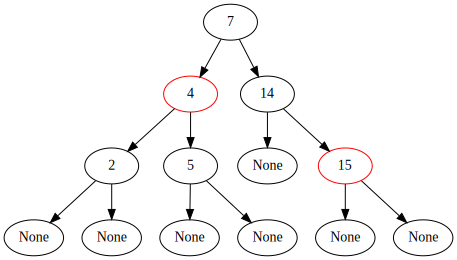

In [60]:
bst.print_pretty_tree()
bst.delete_node(1)

## S140E5: Apresente as árvores de remoção do nó 5 da árvore do exercício anterior.

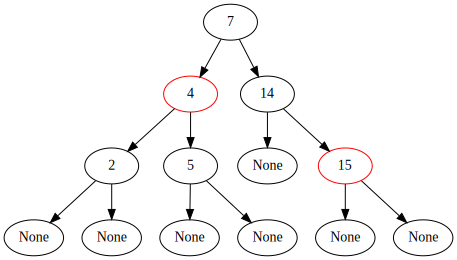

Remove 5


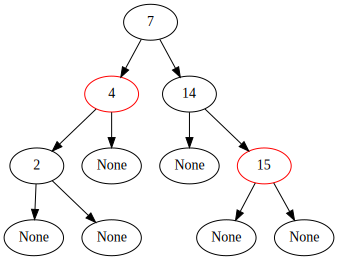

Mexeu em nó preto. Recolore em z = None
z = None é preto
Caso 2: - irmao é preto e tem dois filhos pretos
Irmao fica vermelho,  pai vira novo z = 4


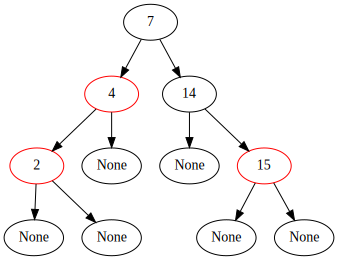

z fica preto


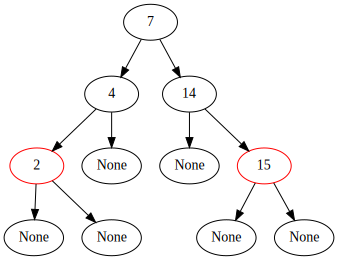

In [61]:
bst.print_pretty_tree()
bst.delete_node(5)